
# Exploration of a DataSet World's Population


### 1. Importing the libraries and necessary DataSets (World's population, Countries geographically for Folium)

In [10]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import json
data = pd.read_csv('./data_population.csv', sep=',', skiprows = 1, header = 1)
country_geo = json.dumps(json.load(open('world-countries.json', 'r'))) #data for representing countries as a map

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


### 2. Data visualisation using Folium

In [21]:
from IPython.display import HTML

def draw_the_map(year):
    
    '''function for drawing the map and assignment of the colors'''
    
    threshold = np.linspace(data[year].min(), 1500000000, 6, dtype = int).tolist()
    map_world = folium.Map(location=[30, 0], zoom_start=1)
    map_world.choropleth(geo_data=country_geo, name='choropleth', data=data, columns=['Country Code', year], key_on='feature.id', fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2, threshold_scale = threshold)
    #map_world.save('plot_world.html') #is commented out for demo reasons

    return HTML('<iframe src=https://github.com/mlynckat/World-s-population-with-folium/blob/master/plot_world.html width=700 height=450></iframe>')

draw_the_map("2015")

Unfortunately this way of visualisation is not meaningful. The map is only providing the information that China and India have the most population, followed by the USA. All the other countries are still in the same segment 10'000-300'000'000. To get more understanding of the figures the data should be focusing on a smaller segment. For this purpose as an example Europe can be considered. But in the provided database there is no information of what countries are actually Europe. This information will be extracted from a Wikipedia page as followed.

### 3. Extracting info from a Wikipedia page

In [24]:
import wikipedia
import requests
from bs4 import BeautifulSoup

wikipedia.search("Europe")

europe = wikipedia.page("Europe")
req = requests.get(europe.url)
soup = BeautifulSoup(req.content, "lxml") 
wikitables = soup.findAll("table", {"class": "sortable"} )


names = []
for row in wikitables[0].findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 8:
        name = cells[2].find(text=True)
        names.append(name)

print (names)

['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']


### 4. Restricting the initial database for European countries only

In [84]:
def check_the_findings(list_of_countries):
    
    '''checking whether the function build_a_list_of countries found all names'''
    
    countries_europe = build_a_list_of_countries(list_of_countries)

    if len(countries_europe) < len(list_of_countries):
        
        not_found = []

        for country in list_of_countries:
            if country not in countries_europe:
                not_found.append(country)
    
        to_remove = []
        for nf_country in not_found:
            for country in countries_europe:
                if nf_country in country:
                    to_remove.append(nf_country)
    
        [not_found.remove(i) for i in to_remove]
    
    return not_found


def build_a_list_of_countries(list_of_countries):
    
    '''building a list of countries according to their name in the data'''
    
    countries_europe = []

    for country in list_of_countries:
        for i in range(0, len(data["Country Name"])):
            if country in data["Country Name"][i]:
                countries_europe.append(data["Country Name"][i])
                
    return(countries_europe)


def apply_a_filter(list_of_countries):    
    
    '''applying a filter on the given database, european countries in this example'''

    bool_europe = []
    for index, row in data.iterrows():
        if data["Country Name"][index] in list_of_countries:
            bool_europe.append(True)
        else:
            bool_europe.append(False)
    data["bool_europe"] = bool_europe
    data_to_plot = data[data["bool_europe"]]
    return data_to_plot
    
print("Countries that were not found: ", check_the_findings(names))

#print("Slovakia in data: ", data["Country Name"][data["Country Code"]=="SVK"]) # is called Slovak Republic in the data
#print("Vatican in data ", data["Country Name"][data["Country Code"]=="VA"]) # not found

countries_europe = build_a_list_of_countries(names)
countries_europe.append("Slovak Republic")

data_to_plot_europe = apply_a_filter(countries_europe)
print(data_to_plot_europe.head())



Countries that were not found:  ['Slovakia', 'Vatican City']
   Country Name Country Code       1960       1961       1962       1963  \
3       Albania          ALB  1608800.0  1659800.0  1711319.0  1762621.0   
4       Andorra          AND    13411.0    14375.0    15370.0    16412.0   
8       Armenia          ARM  1874120.0  1941491.0  2009526.0  2077575.0   
12      Austria          AUT  7047539.0  7086299.0  7129864.0  7175811.0   
13   Azerbaijan          AZE  3895396.0  4030320.0  4171425.0  4315128.0   

         1964       1965       1966       1967     ...            2009  \
3   1814135.0  1864791.0  1914573.0  1965598.0     ...       2927519.0   
4     17469.0    18549.0    19647.0    20758.0     ...         84462.0   
8   2144998.0  2211316.0  2276031.0  2339124.0     ...       2888584.0   
12  7223801.0  7270889.0  7322066.0  7376998.0     ...       8343323.0   
13  4456689.0  4592610.0  4721525.0  4843870.0     ...       8947243.0   

         2010       2011       2012  

### 5. Redrawing the map for Europe area only 

In [85]:
def draw_europe(year):
    
    '''drawing the population map for european countries only'''
    
    threshold = np.linspace(data_to_plot_europe[year].min(), data_to_plot_europe[year].max(), 6, dtype = int).tolist()
    map_europe = folium.Map(location=[60, 30], tiles='cartodbpositron', zoom_start=3)
    map_europe.choropleth(geo_data=country_geo, name='choropleth', data=data_to_plot_europe, columns=['Country Code', year], key_on='feature.id', fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2, threshold_scale = threshold, legend_name='Population')
    #map_europe.save('plot_europe.html') #is commented out for demo reasons
    return HTML('<iframe src=https://github.com/mlynckat/World-s-population-with-folium/blob/master/plot_europe.html width=700 height=450></iframe>')

draw_europe("2015")


After focusing on plotting of the european map only, there is much more information to be taken from the illustration. For example, expectedly the giant Russian Federation is the only one country in the interval with the most population in Europe: more than 115,284,088 people. All Scandinavian countries are another example of information given by this way of presenting the results: all the countries are in the segment of less than 28,845,742 people.
However this data is only representing the year 2015. To see the information about the population from other years, some interactivity must be added. 

### 6. Interactivity. Representation of different years

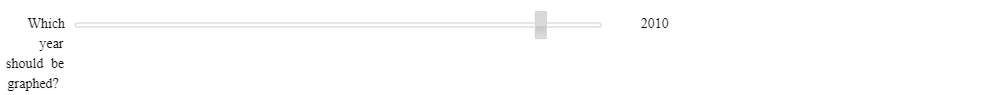

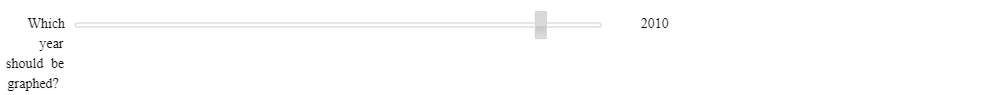

In [111]:
from ipywidgets import widgets, Layout, Label, interactive
from IPython.display import display, HTML
import traitlets


columns = data.columns.tolist()
columns = columns[2:-2]


selection = widgets.SelectionSlider(description = "Which year should be graphed?", options = columns, value="2010", continuous_update=False, layout=Layout(width='70%', height='80px'))

year = selection.value

w=widgets.interactive(draw_europe, year=selection)
display(w)



Now having the possibility to compare the data from different years we can see for example how the population of Italy shrunk from being in the third biggest segment to the second biggest in the beginning of 80's. Or on the contrary, it can be seen how population of France and Turkey grew in the 90's and these countries moved from the fourth biggest segment to the third biggest. This conclusions are relative though since the segments are calculated on the basis of the most and the least populated countries of a certain year. 